In [59]:
import numpy as np
import matplotlib.pyplot as plt
from dynamicalsystems.lorenz63 import Lorenz63Model
from DAmethod.EnKF import EnKF
from DAmethod.ETKF import ETKF
%matplotlib inline

In [60]:
Nensemble = 64 * 2
period_assim = 1
Nsteps = 200
state_dimension= 3
inflation_factor = 1.01

In [61]:
# Properties of the model
dt = 0.02
Lorenz63Model.dt = dt
H = np.atleast_2d([[1, 0, 0], [0, 1, 0]])
sigobs = 5
R = sigobs * np.atleast_2d([[1, 0], [0, 1]])

In [62]:
truth = Lorenz63Model()
truth.set_initial_state(-5000 * dt, np.array([0, 1, 0]))
truth.forward(5000)  # Burn-in period
def generate_observations(i):
    truth.forward(period_assim)
    y = truth.state_vector[:, -1] + np.random.randn(1) * sigobs
    return truth.t[-1], y
initial_state = truth.state_vector[:, -1]

In [63]:
enkf = EnKF(state_dimension, Nensemble, R, inflation_factor)
enkf.H = H
enkf.set_forwardmodel(lambda x: Lorenz63Model.integrate(0, x, period_assim)[1][:, -1])
enkf.generate_ensemble(mean=initial_state, cov=np.eye(state_dimension))


dEnKF = enkf.run(Nsteps, get_obs=generate_observations)

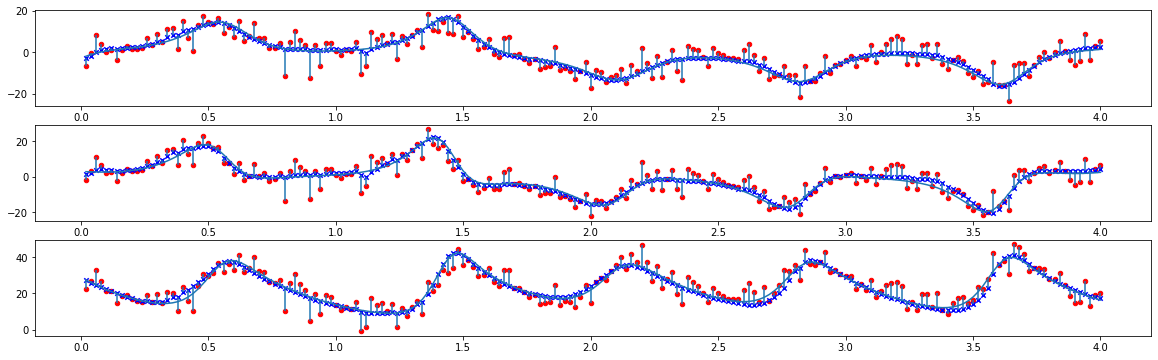

In [64]:
est_ = np.array(dEnKF["ensemble_a"]).mean(-1)
obs_ = np.array(dEnKF["observations"])
plt.figure(figsize=(20, 6))
for i in range(3):
    plt.subplot(3, 1, i + 1)
    plt.plot(truth.t[5001:], truth.state_vector[i, 5001:])
    plt.scatter(dEnKF["time"], obs_[:, i], marker="o", c="red", s=20)
    plt.scatter(dEnKF["time"], est_[:, i], marker="x", color="blue", s=20)
    plt.vlines(dEnKF["time"], est_[:, i], obs_[:, i])
plt.show()

In [65]:
obs_.shape

(200, 3)